In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

nltk.download('vader_lexicon')
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/qiweihe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/qiweihe/nltk_data...


In [15]:
data = pd.read_csv('result.csv')
# shape of the dataset 
print("Shape of the dataset:")
print(data.shape)
# column names
print("Column names:")
print(data.columns)
# datatype of each column
print("Datatype of each column:")
print(data.dtypes)
# some
print("Some dataset entries:")
print(data.head())
# summary
data.describe(include='all')

Shape of the dataset:
(1244, 13)
Column names:
Index(['review_id', 'user_id', 'business_id', 'review/0/0', 'date', 'time',
       'categories', 'city', 'state', 'stars', 'business_review_count',
       'predicted_review_score', 'actual_yelp_score'],
      dtype='object')
Datatype of each column:
review_id                  object
user_id                    object
business_id                object
review/0/0                 object
date                       object
time                       object
categories                 object
city                       object
state                      object
stars                     float64
business_review_count       int64
predicted_review_score    float64
actual_yelp_score           int64
dtype: object
Some dataset entries:
                review_id                 user_id             business_id  \
0  G1R-wZSTfuKmjECPweBlog  SrwHXDUhVDAOeLUG1Tux5A  fJQHj9Sq1R0a9FO08q8HWw   
1  6kspElQoYsBaFTYDtv0lUw  LojDefMzt-_qhj-9ZjJqUw  uzhiTCvVaK_0fZwa7rWD

,review_id,user_id,business_id,review/0/0,date,time,categories,city,state,stars,business_review_count,predicted_review_score,actual_yelp_score
count,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244.000000,1244.000000,1244.000000,1244.000000
unique,1239,1229,1117,1239,935,1224,863,181,14,NaN,NaN,NaN,NaN
top,Pe_cQ6J9X1yI0dEgS5cV3w,gVzan-ALI1w1jGrUceaofg,_ab50qdWOk0DdB6XOrBitw,"May 25, 2015 Monday at 8:30 AM Breakfast\r\n2 ...",2020-08-02,03:35:01,"Live/Raw Food, Seafood, Restaurants, Cajun/Creole",Philadelphia,PA,NaN,NaN,NaN,NaN
freq,2,3,61,2,8,2,61,188,262,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.352090,656.963826,3.003678,3.365756
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.971138,1716.809191,1.793419,1.647197
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,32.000000,1.375000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,76.000000,3.375000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,302.750000,4.825000,5.000000


In [16]:

#new colum for #of words in the review
data['length'] = data['review/0/0'].apply(len)
data.head()

,review_id,user_id,business_id,review/0/0,date,time,categories,city,state,stars,business_review_count,predicted_review_score,actual_yelp_score,length
0,G1R-wZSTfuKmjECPweBlog,SrwHXDUhVDAOeLUG1Tux5A,fJQHj9Sq1R0a9FO08q8HWw,worst fucking service ever. i walked in and wa...,2020-05-27,18:24:40,"Coffee & Tea, Food",Nashville,TN,3.0,30,0.075,1,230
1,6kspElQoYsBaFTYDtv0lUw,LojDefMzt-_qhj-9ZjJqUw,uzhiTCvVaK_0fZwa7rWDzw,Terrible service by Barista too busy chatting....,2016-11-05,20:48:47,"Food, Coffee & Tea",Tucson,AZ,4.0,39,1.025,1,383
2,eZjowtS53nHe1KBulkQ2sA,n7TlGclA7W8-UwZ0ozng0g,_8bELjUz5tnftBbXAxKyjA,Amazing this store is so funny. The workers la...,2021-04-07,02:43:40,"Coffee & Tea, Food",St. Louis,MO,3.5,34,4.975,5,151
3,VSgDxCJcEwTXKJK4HaKQHg,xyI9DCVKW91P6RMLdan0KA,MeA_7cfxh9c7wczQHYQKeQ,It is never a bad thing when a Starbucks has a...,2012-11-01,15:35:16,"Coffee & Tea, Food",Edmonton,AB,2.0,11,3.275,4,280
4,XQ_ByAZ4oWCpxLIfYuntfA,ASPYq2tVrSgcnzk75uUOnw,QnVOsBJWKZ6nN79VbV6l2Q,"The drinks are well made, the staff is very fr...",2015-08-26,04:48:53,"Coffee & Tea, Food, Restaurants",Avon,IN,3.0,34,1.525,3,110


# Relationship between review length and star's value

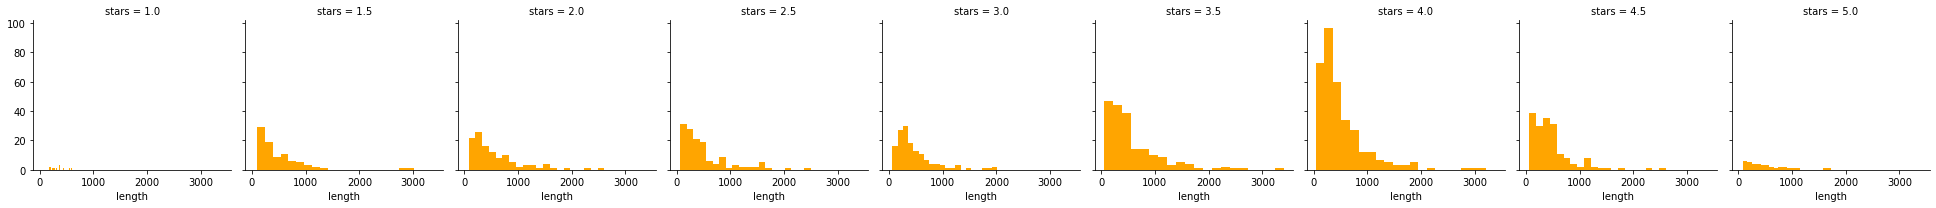

In [17]:
#see the relationship between revew length and star's value

graph = sns.FacetGrid(data=data,col='stars')
graph.map(plt.hist,'length',bins=20,color='orange')

In [18]:
# Classfication of stars
data_classes = data[(data['stars']==1) | (data['stars']==3) | (data['stars']==5)]
data_classes.head()
print(data_classes.shape)

(192, 14)


In [19]:
# separation of dataset 
x = data_classes['review/0/0']
y = data_classes['stars']
print(x.head())
print(y.head())

0     worst fucking service ever. i walked in and wa...
4     The drinks are well made, the staff is very fr...
6     Do yourself a favor and download the app and p...
12    came in on vacation and they were so speedy wi...
16    Would be better if the staff didn't talk bad a...
Name: review/0/0, dtype: object
0     3.0
4     3.0
6     3.0
12    3.0
16    3.0
Name: stars, dtype: float64


In [22]:

#removal of stopwords and punctuation
def removal(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

# Modeling with different models to check which one would give best performance

In [24]:
# words to vector 
vocab = CountVectorizer(analyzer= removal).fit(x)
print(len(vocab.vocabulary_))
r0 = x[0]
print(r0)
vocab0 = vocab.transform([r0])
print(vocab0)
"""
    Now the words in the review number 78 have been converted into a vector.
    The data that we can see is the transformed words.
    If we now get the feature's name - we can get the word back!
"""
print("Getting the words back:")
print(vocab.get_feature_names()[345])
print(vocab.get_feature_names()[367])

3166
worst fucking service ever. i walked in and was completely ignored. 3 ppl walked in after me and were greeted immediately. i would've never gotten my drink if i hadn't spoken up. i ordered my regular drink and it tasted like shit.
  (0, 35)	1
  (0, 1073)	1
  (0, 1282)	2
  (0, 1356)	1
  (0, 1520)	1
  (0, 1573)	1
  (0, 1585)	1
  (0, 1610)	1
  (0, 1718)	1
  (0, 1721)	1
  (0, 1860)	1
  (0, 2065)	1
  (0, 2137)	1
  (0, 2305)	1
  (0, 2421)	1
  (0, 2573)	1
  (0, 2596)	1
  (0, 2720)	1
  (0, 2834)	1
  (0, 3056)	2
  (0, 3140)	1
  (0, 3144)	1
Getting the words back:
Loco
Market


In [25]:
x = vocab.transform(x)
#shape of the matrix:
print("Shape of the sparse matrix: ", x.shape)

#Non-zero occurences:
print("Non-Zero occurences: ",x.nnz)

# Density of M
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (192, 3166)
Non-Zero occurences:  7594
Density of the matrix =  1.2492761634028218


In [27]:
#split data into train and test dataset 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [28]:
# 1.Random Forest
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[ 0  1  0]
 [ 0 34  0]
 [ 0  4  0]]
Score: 87.18
Classification Report:               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         3.0       0.87      1.00      0.93        34
         5.0       0.00      0.00      0.00         4

    accuracy                           0.87        39
   macro avg       0.29      0.33      0.31        39
weighted avg       0.76      0.87      0.81        39



/Users/qiweihe/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# 2.Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[ 1  0  0]
 [ 3 27  4]
 [ 1  0  3]]
Score: 79.49
Classification Report:               precision    recall  f1-score   support

         1.0       0.20      1.00      0.33         1
         3.0       1.00      0.79      0.89        34
         5.0       0.43      0.75      0.55         4

    accuracy                           0.79        39
   macro avg       0.54      0.85      0.59        39
weighted avg       0.92      0.79      0.84        39



In [30]:
# 3.Support Vector Machine
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[ 0  1  0]
 [ 0 34  0]
 [ 0  4  0]]
Score: 87.18
Classification Report:               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         3.0       0.87      1.00      0.93        34
         5.0       0.00      0.00      0.00         4

    accuracy                           0.87        39
   macro avg       0.29      0.33      0.31        39
weighted avg       0.76      0.87      0.81        39



/Users/qiweihe/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# 4.K Nearest Neighbour Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))

Confusion Matrix for K Neighbors Classifier:
[[ 0  1  0]
 [ 0 34  0]
 [ 0  4  0]]
Score:  87.18
Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         3.0       0.87      1.00      0.93        34
         5.0       0.00      0.00      0.00         4

    accuracy                           0.87        39
   macro avg       0.29      0.33      0.31        39
weighted avg       0.76      0.87      0.81        39



/Users/qiweihe/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Compare score:
1.Random Forest:87.18
2.Multinomial Naive Bayes:79.49
3.Support Vector Machine:87.18
4.KNN: 87.18

--> Other than Multinomial Naive Bayes, all three models gives very high performance. 

In [37]:
# random positive review
pr = data['review/0/0'][300]
print(pr)
print("Actual Rating: ",data['stars'][300])
pr_t = vocab.transform([pr])
print("Predicted Rating:")
mlp.predict(pr_t)[0]

Staff was great.  Food was pretty good. We had the south west chicken pie and sausage pie and were really happy with the selection.  Their salads were decent sized and well done.  Apple pie was awesome.  My wife who is a pie maker/snob was really impressed with the apple pie.
Actual Rating:  4.0
Predicted Rating:


3.0

In [36]:
# random average review
ar = data['review/0/0'][16]
print(ar)
print("Actual Rating: ",data['stars'][16])
ar_t = vocab.transform([ar])
print("Predicted Rating:")
mlp.predict(ar_t)[0]

Would be better if the staff didn't talk bad about their customers when other customers can hear. Overall not a bad experience; staff seemed to enjoy each other's company. But it leaves a bad taste hearing then talk about other clients in a bad way while people waiting for their drinks. It just leaves a bad taste and makes me wonder what they say about me when I leave.
Actual Rating:  3.0
Predicted Rating:


3.0

In [66]:
# random negative review
nr = data['review/0/0'][40]
print(nr)
print("Actual Rating: ",data['stars'][40])
nr_t = vocab.transform([nr])
print("Predicted Rating:")
mlp.predict(nr_t)[0]

Your typical Starbucks located within another organization - small and without a lot of the extras. For example, no breakfast sandwiches :( Or any hot food what-so-ever. But staff was friendly.
Actual Rating:  2.0
Predicted Rating:


3.0

In [39]:
count = data['stars'].value_counts()
print(count)

4.0    342
3.5    196
4.5    175
3.0    143
2.5    136
2.0    116
1.5     87
5.0     37
1.0     12
Name: stars, dtype: int64


Analysis: The model is better at prediciting reviews with positive and average(neutral) attributes. The possible reason could be that the amount of positive and average(neutral) reviews are much more than negative reviews from the stat above, therefore the trained results are more accurate for positive and average(neutral) reviews. 

# Insights into reviews' distribution

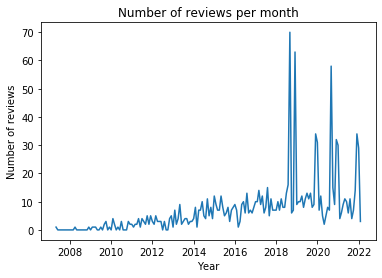

In [43]:
import matplotlib.pyplot as plt
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
plt.plot(data['review/0/0'].resample('M').count())
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.title('Number of reviews per month')
plt.show()

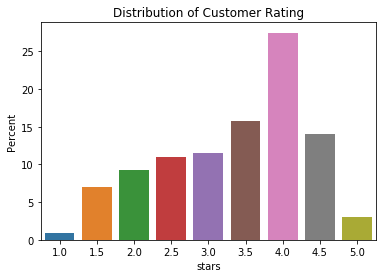

In [51]:
import seaborn as sns
ax = sns.barplot(data=data, x='stars', y='stars', estimator=lambda x: len(x) / len(data) * 100)
ax.set(ylabel="Percent")
plt.title('Distribution of Customer Rating')
plt.show()

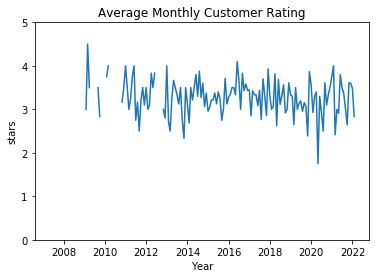

In [110]:
plt.plot(data['stars'].resample('M').mean())
plt.xlabel('Year')
plt.ylabel('stars')
plt.title('Average Monthly Customer Rating')
plt.ylim(0,5)
plt.show()

# Tokenization and Bag-of-Words

In [70]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
my_stop_words = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS) + ['super', 'duper', 'place'])

/Users/qiweihe/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [88]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist
import nltk
nltk.download('punkt')
full_text = ' '.join(data['review/0/0'])
lower_full_text = full_text.lower()
word_tokens = word_tokenize(lower_full_text)
tokens = list()
for word in word_tokens:
    if word.isalpha() and word not in my_stop_words:
        tokens.append(word)
token_dist = FreqDist(tokens)
dist = pd.DataFrame(token_dist.most_common(30),columns=['Word', 'Frequency'])

[nltk_data] Downloading package punkt to /Users/qiweihe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


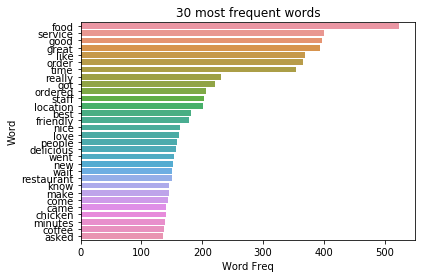

In [109]:
import seaborn as sns
ax = sns.barplot(data=dist, x='Frequency', y='Word' )
ax.set(xlabel="Word Freq")
plt.title('30 most frequent words')
plt.show()

In [ ]:
For better accuracy, the words are stemed to the basic root form. The word accompanied with suffies is simplified.  

In [90]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
stemmed_tokens =[porter.stem(word) for word in tokens]
stemmed_token_dist = FreqDist(stemmed_tokens)
stemmed_dist = pd.DataFrame(stemmed_token_dist.most_common(30),columns=['Word', 'Frequency'])

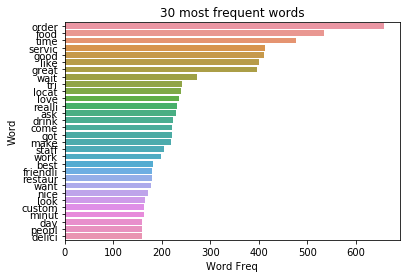

In [108]:
import seaborn as sns
ax = sns.barplot(data=stemmed_dist, x='Frequency', y='Word' )
ax.set(xlabel="Word Freq")
plt.title('30 most frequent words')
plt.show()

There are changes in the top words of frequency after stemming. 

# N-gram analysis

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words=my_stop_words, ngram_range=(2,2))
bigrams = vect.fit_transform(data['review/0/0'])
bigram_df = pd.DataFrame(bigrams.toarray(), columns=vect.get_feature_names())
bigram_frequency = pd.DataFrame(bigram_df.sum(axis=0)).reset_index()
bigram_frequency.columns = ['bigram', 'frequency']
bigram_frequency = bigram_frequency.sort_values(by='frequency', ascending=False).head(30)

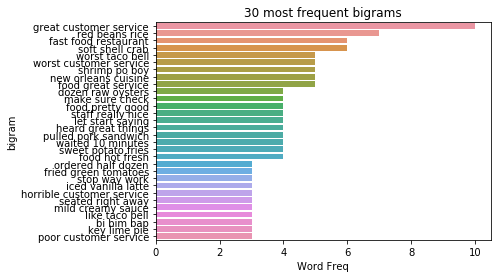

In [107]:
ax = sns.barplot(data=bigram_frequency, x='frequency', y='bigram' )
ax.set(xlabel="Word Freq")
plt.title('30 most frequent bigrams')
plt.show()

In [101]:
vect = CountVectorizer(stop_words=my_stop_words, ngram_range=(3,3))
trigrams = vect.fit_transform(data['review/0/0'])
trigram_df = pd.DataFrame(trigrams.toarray(), columns=vect.get_feature_names())
trigram_frequency = pd.DataFrame(trigram_df.sum(axis=0)).reset_index()
trigram_frequency.columns = ['trigram', 'frequency']
trigram_frequency = trigram_frequency.sort_values(by='frequency', ascending=False).head(30)

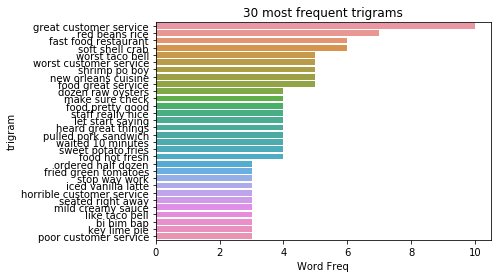

In [106]:
ax = sns.barplot(data=trigram_frequency, x='frequency', y='trigram' )
ax.set(xlabel="Word Freq")
plt.title('30 most frequent trigrams')
plt.show()

# Sentiment Score Analysis 

In [105]:
nltk.download('vader_lexicon')
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
# Generate sentiment scores
sentiment_scores = data['review/0/0'].apply(sid.polarity_scores)
sentiment = sentiment_scores.apply(lambda x: x['compound'])
monthly_sentiment = sentiment.resample('M').mean()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/qiweihe/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


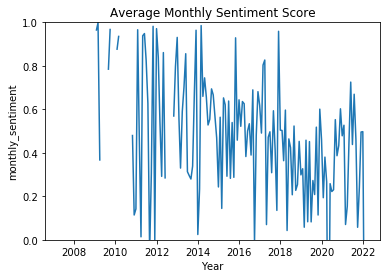

In [119]:
plt.plot(sentiment.resample('M').mean())
plt.xlabel('Year')
plt.ylabel('monthly_sentiment')

plt.title('Average Monthly Sentiment Score')
plt.ylim(0,1)
plt.show()

citation:
1.https://towardsdatascience.com/text-mining-and-sentiment-analysis-for-yelp-reviews-of-a-burger-chain-6d3bcfcab17b
2.https://www.kaggle.com/code/omkarsabnis/sentiment-analysis-on-the-yelp-reviews-dataset
